In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ImageLoader

In [2]:
def calc_dist(test, data):
    """
    Calculates the L2 distance between two feature vectors.
    
    Parameters
    ----------
    test: numpy array, shape (N,)
    data: numpy array, shape (N,)
    
    Returns
    -------
    float
    """
    return np.sqrt(np.sum((test - data)**2))

In [120]:
def is_face(test_desc, profile_mean, threshold):
    """
    Determines whether or not a descriptor is close enough to a face,
    returning False if the L2 distance is greater than the threshold.
    
    Parameters
    ----------
    test_desc: numpy array, shape (N,)
        The descriptor of the unknown face being tested.
    profile_mean: numpy array, shape (N,)
        The mean of descriptors for the profile being tested.
    threshold: numerical value (int, float)
        The maximum L2 distance accepted as a match.
        
    Returns
    -------
    float, if L2 distance is less than the threshold
    None, otherwise
    """
    l2d = calc_dist(test_desc, profile_mean)
    if l2d < threshold:
        return l2d
    return None

In [121]:
def identify_face(desc, database, threshold=0.5, face_thres=0):
    """
    Compares a test descriptor to all faces in a database and determines the best match, if any.
    
    Parameters
    ----------
    desc: numpy array, shape (N,)
        The descriptor of the unknown face being tested.
    database: dictionary
        The database containing name keys and a list of descriptor vectors as well as the mean.
    threshold: numerical value (int, float)
        The maximum L2 distance accepted as a face match.
    face_thres: numerical value (int, float)
        The minimum distance between the top two matches to count a match.
        
    Returns
    -------
    string, representing the name/key if a match is found
    None, otherwise
    """
    matches = []
    for key, data in database.items():
        i_f = is_face(desc, data[1], threshold)
        if i_f is not None:
            matches.append((key, i_f))
    if len(matches) == 0:
        return None
    if len(matches) == 1:
        return matches[0][0]
    matches = sorted(matches, key=lambda x: x[1])
    if matches[1][1] - matches[0][1] > face_thres:
        return matches[0][0]
    return None

In [126]:
def compare_faces(descriptors, database):
    """
    Compares each face with the database and returns a list of detected people.
    
    Parameters
    ----------
    descriptors: list of numpy arrays
        List of descriptor vectors corresponding to the features of each face.
    database: dictionary
        The database containing name keys and a list of descriptor vectors as well as the mean.
        
    Returns
    -------
    list of strings, or None if match not found for that unit
    """
    people = []
    for d in descriptors:
        result = find_face(d, database)
        people.append(result)
    return people

In [ ]:
def draw_faces(detections, people, img):
    """
    Draws bounding boxes over image, and labels them with people.
    
    Parameters
    ----------
    detections: list of rectangles
        List of bounding box rectangles corresponding to the position of each detected face.
    people: list of strings
        List of the keys/names of people as found by compare_faces(), or None if no match is found.
    img: numpy array, shape ()
    """

(480, 640, 3)


<IPython.core.display.Javascript object>


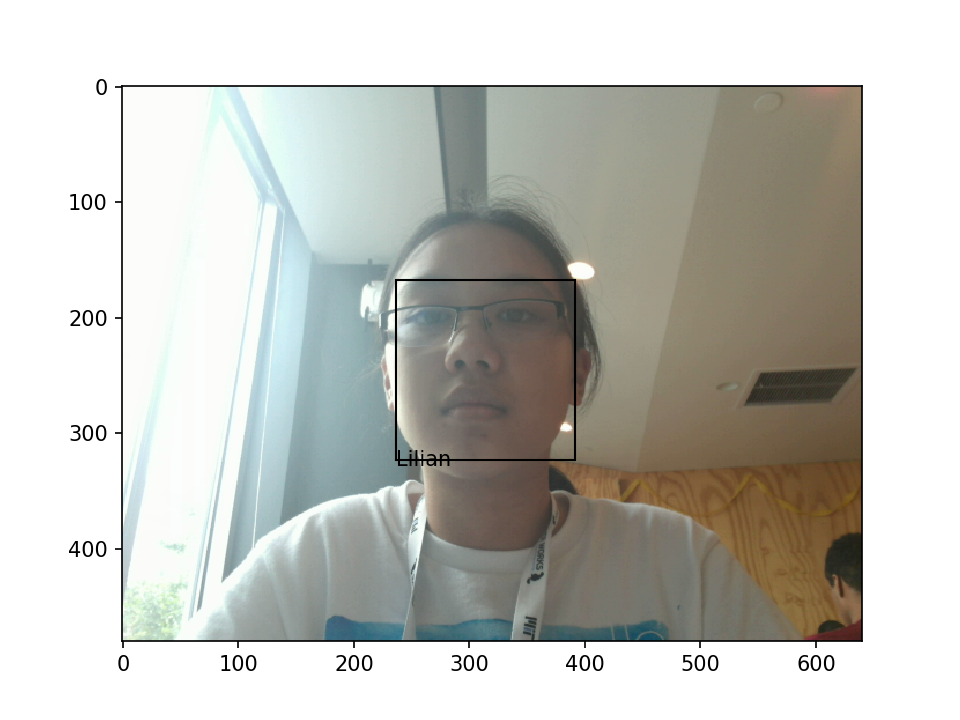

In [128]:
img = ImageLoader.get_img_from_camera()
detections = ImageLoader.find_faces(img)
print(img.shape)


fig,ax = plt.subplots()
ax.imshow(img)
for d in detections:
    rect = patches.Rectangle((d.left(), d.top()), d.width(), d.height(), fill=False)
    ax.add_patch(rect)
    ax.text(d.left(), d.top() + d.height() + 5, "Lilian")
plt.show()